# 1) Initial Test for Phase Space Plotting

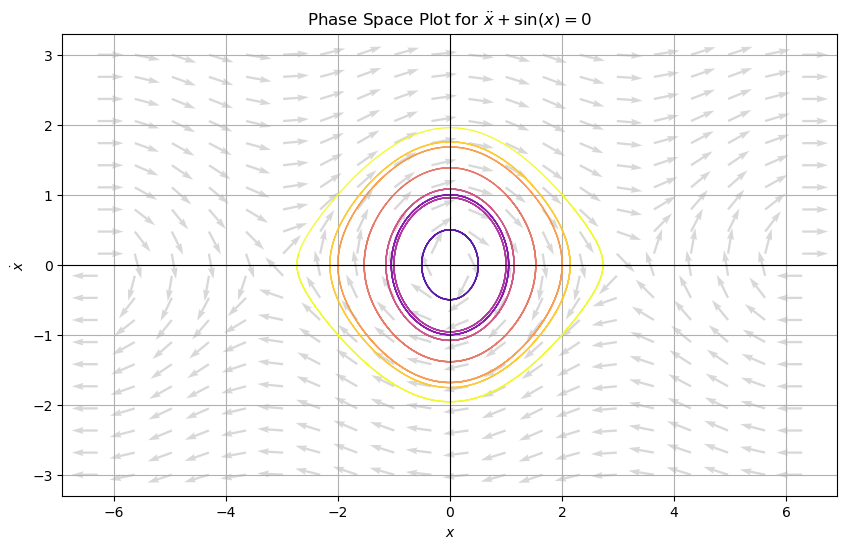

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the system of first-order ODEs
def phase_space_system(state, t):
    """
    Computes the derivatives dx/dt and d^2x/dt^2 for the system:
        dx/dt = v
        dv/dt = -sin(x)
    """
    x, v = state  # Unpack state vector
    dxdt = v
    dvdt = -np.sin(x)
    return [dxdt, dvdt]

# Create a grid for the phase-space plot
x_vals = np.linspace(-2*np.pi, 2*np.pi, 20)  # Position range
v_vals = np.linspace(-3, 3, 20)  # Velocity range
X, V = np.meshgrid(x_vals, v_vals)  # Mesh grid

# Compute the vector field
DX = V
DV = -np.sin(X)

# Normalize for uniform arrow sizes
norm = np.sqrt(DX**2 + DV**2)
DX, DV = DX/norm, DV/norm  

# Create the figure
plt.figure(figsize=(10, 6))

# Quiver plot with lighter arrows
plt.quiver(X, V, DX, DV, color='gray', alpha=0.3, scale=30)

# Solve for example trajectories in phase space
t = np.linspace(0, 20, 1000)  # Time for integration
initial_conditions = [[x0, v0] for x0 in np.linspace(0, 2, 3) for v0 in np.linspace(0,1,3)]

# Color gradient: cooler for stability, warmer for instability
colors = plt.cm.plasma(np.linspace(0, 1, len(initial_conditions)))
for idx, ic in enumerate(initial_conditions):
    sol = odeint(phase_space_system, ic, t)
    plt.plot(sol[:, 0], sol[:, 1], color=colors[idx % len(colors)], linestyle='-', linewidth=1, alpha=0.9)

# Labels and aesthetics
plt.xlabel(r"$x$")
plt.ylabel(r"$\dot{x}$")
plt.title("Phase Space Plot for $\ddot{x} + \sin(x) = 0$")
plt.axhline(0, color='black', linewidth=0.8)  # Horizontal axis
plt.axvline(0, color='black', linewidth=0.8)  # Vertical axis
plt.grid(True)
plt.show()


# 2) Modularizing and making it re-usable for any System of ODE

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# -----------------------------
# Define acceleration functions
# -----------------------------

# Harmonic Oscillator
def harmonic_oscillator(x, v, t, k=1):
    return -k * x

# Damped Oscillator
def damped_oscillator(x, v, t, k=1, c=0.1):
    return -k * x - c * v

# Nonlinear Pendulum
def nonlinear_pendulum(x, v, t):
    return -np.sin(x)

# -----------------------------
# Modular Phase Space System
# -----------------------------

def phase_space_system(state, t, acceleration_func):
    """
    Computes dx/dt and dv/dt for a given second-order system.

    Parameters:
        state (list): [x, v] where x is position and v is velocity.
        t (float): Time (not used in autonomous systems but included for generality).
        acceleration_func (function): Function defining acceleration f(x, v, t).

    Returns:
        list: [dx/dt, dv/dt]
    """
    x, v = state  # Unpack state vector
    dxdt = v
    dvdt = acceleration_func(x, v, t)  # Use the provided acceleration function
    return [dxdt, dvdt]

# -----------------------------
# Create a grid for the phase-space plot
# -----------------------------

def plot_phase_space(acceleration_func, title):
    """
    Plots the phase-space diagram with quiver arrows and trajectory contours.

    Parameters:
        acceleration_func (function): Function defining acceleration f(x, v, t).
        title (str): Title of the plot.
    """

    # Create grid for vector field
    x_vals = np.linspace(-5, 5, 40)  # Increase from 20 to 40
    v_vals = np.linspace(-5, 5, 40)

    X, V = np.meshgrid(x_vals, v_vals)  # Mesh grid

    # Compute the vector field dynamically
    DX = V
    DV = np.array([[acceleration_func(x, v, 0) for x, v in zip(x_row, v_row)] for x_row, v_row in zip(X, V)])

    # Normalize for uniform arrow sizes
    norm = np.sqrt(DX**2 + DV**2)
    DX, DV = DX/norm, DV/norm  

    # Create the figure
    plt.figure(figsize=(10, 6))

    # Quiver plot with lighter arrows
    plt.quiver(X, V, DX, DV, color='gray', alpha=0.3, scale=30)

    # Solve for example trajectories in phase space
    t = np.linspace(0, 100, 500)  # Time for integration
    
    # **Dynamically scale initial conditions based on acceleration**
    x_range = np.linspace(-5, 5, 20)  # Keep position range limited
    v_range = np.linspace(-5, 5, 20)  # Keep velocity within stable range

    initial_conditions = [[x0, v0] for x0 in x_range for v0 in v_range]

    # Compute radial distances for initial conditions
    radii = np.sqrt(np.array([x0**2 + v0**2 for x0, v0 in initial_conditions])) / 4
    colors = plt.cm.plasma(radii)  
    for idx, ic in enumerate(initial_conditions):
        sol = odeint(phase_space_system, ic, t, args=(acceleration_func,))
        plt.plot(sol[:, 0], sol[:, 1], color=colors[idx % len(colors)], linestyle='-', linewidth=1, alpha=0.9)

    # Labels and aesthetics
    plt.xlabel(r"$x$")
    plt.ylabel(r"$\dot{x}$")
    plt.title(title)
    plt.axhline(0, color='black', linewidth=0.8)  # Horizontal axis
    plt.axvline(0, color='black', linewidth=0.8)  # Vertical axis
    plt.grid(True)
    # **Manually configure the graph limits**
    plt.xlim(-4, 4)  # Limit x-axis range
    plt.ylim(-4, 4)  # Limit velocity range
    plt.show()

# -----------------------------
# Run phase space plots for different systems
# -----------------------------

plot_phase_space(nonlinear_pendulum, r"Phase Space Plot for $\ddot{x} + \sin(x) = 0$")
plot_phase_space(harmonic_oscillator, r"Phase Space Plot for Harmonic Oscillator $\ddot{x} + kx = 0$")
plot_phase_space(lambda x, v, t: damped_oscillator(x, v, t, k=1, c=0.2), r"Phase Space Plot for Damped Oscillator $\ddot{x} + kx + c\dot{x} = 0$")